=== TASK 1: Basic Projection ===
3D Points:
[[ 0.1  0.1  1. ]
 [ 0.2  0.2  2. ]
 [-0.1 -0.1  1. ]
 [ 0.3  0.   0.5]]

Projected 2D Points:
[[400. 320.]
 [400. 320.]
 [240. 160.]
 [800. 240.]]


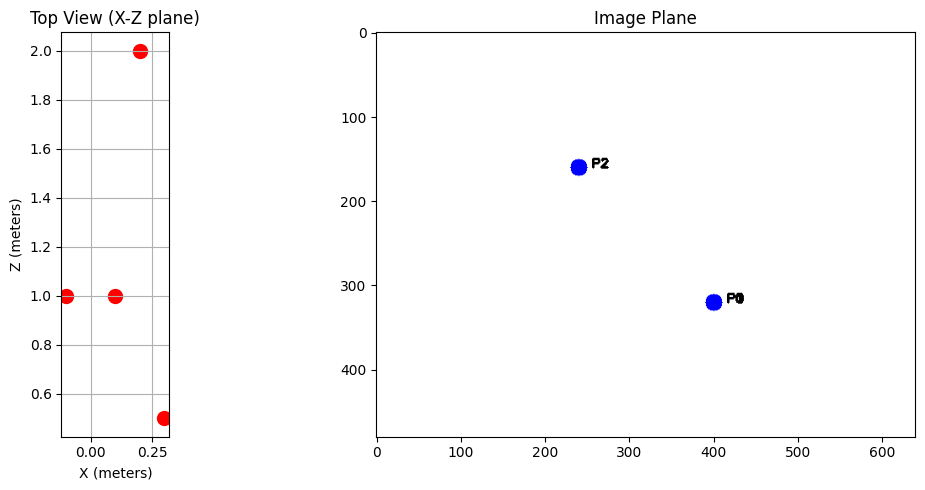


=== TASK 3: Parameter Effects ===
Focal length 400: Point [0.1 0.1 1. ] -> [360. 280.]
Focal length 800: Point [0.1 0.1 1. ] -> [400. 320.]
Focal length 1600: Point [0.1 0.1 1. ] -> [480. 400.]
Translation 0: [0 0 0] -> Point [400. 320.]
Translation 1: [0.2 0.  0. ] -> Point [560. 320.]
Translation 2: [ 0.   0.  -0.5] -> Point [480. 400.]

=== TASK 4: Camera Calibration Simulation ===
Calibration Results:
Success: 2.6899155262420194

Ground Truth K:
[[850   0 320]
 [  0 850 240]
 [  0   0   1]]

Estimated K:
[[1.16287544e+03 0.00000000e+00 3.19500000e+02]
 [0.00000000e+00 1.11357345e+03 2.39500000e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Error in fx: 36.81%
Error in fy: 31.01%

=== TASK 5: Reprojection Error ===
Mean reprojection error: nan pixels
Max reprojection error: nan pixels
Std of errors: nan pixels


C:\Users\75MAMIRUZZAM\AppData\Local\Temp\ipykernel_26152\2294263500.py:50: RuntimeWarning: divide by zero encountered in divide
  points_2d = points_proj[:, :2] / points_proj[:, 2:]
C:\Users\75MAMIRUZZAM\AppData\Local\Temp\ipykernel_26152\2294263500.py:50: RuntimeWarning: invalid value encountered in divide
  points_2d = points_proj[:, :2] / points_proj[:, 2:]


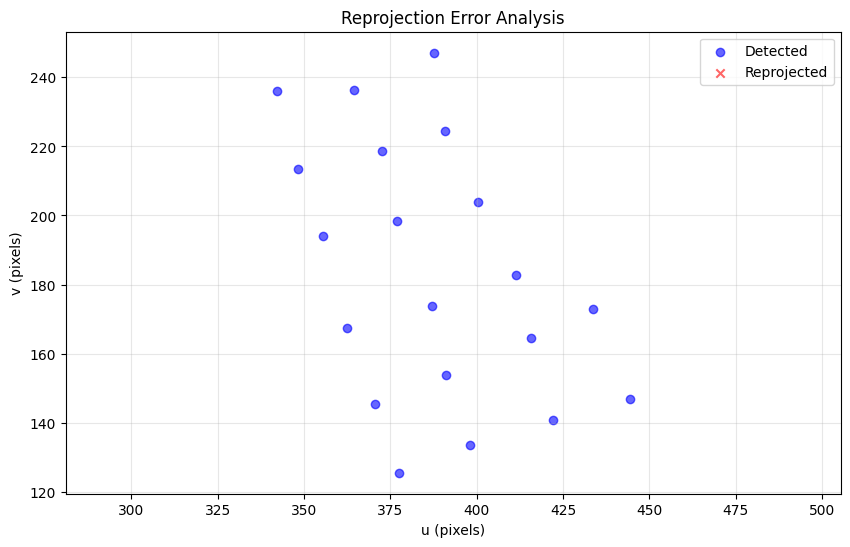


=== TASK 6: Lens Distortion ===


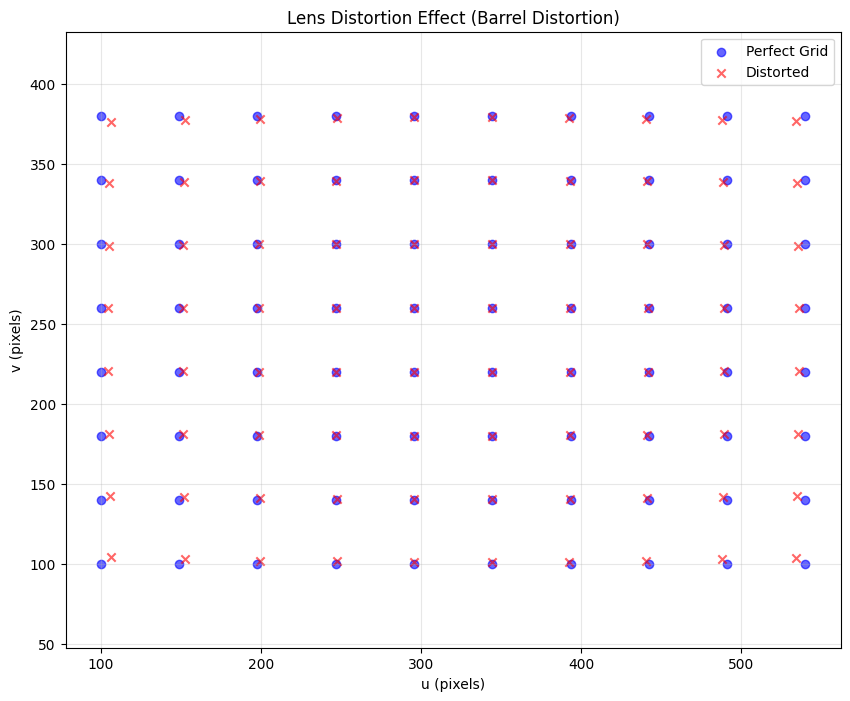


=== ASSIGNMENT QUESTIONS ===
1. How does increasing focal length affect object size in the image?
2. What happens to the projection when an object moves from Z=1 to Z=0.1?
3. Why do we need camera calibration in real applications?
4. How does lens distortion violate the pinhole model assumptions?
5. What is reprojection error and why is it important in calibration?

Submit:
1. Answers to all questions
2. Three generated images: projection_visualization.png,
   reprojection_error.png, lens_distortion.png
3. Code with comments explaining each step


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_simple_camera():
    """
    Create a simple pinhole camera model
    
    Returns:
        K: 3x3 intrinsic matrix
        R: 3x3 rotation matrix (identity)
        t: 3x1 translation vector (zero)
    """
    # Intrinsic parameters (simple camera)
    fx, fy = 800, 800  # focal length in pixels
    cx, cy = 320, 240  # principal point
    K = np.array([[fx, 0, cx],
                  [0, fy, cy],
                  [0, 0, 1]])
    
    # Extrinsic parameters (camera at origin looking along Z)
    R = np.eye(3)  # no rotation
    t = np.array([[0], [0], [0]])  # at origin
    
    return K, R, t

def project_points(K, R, t, points_3d):
    """
    Project 3D points to 2D image coordinates
    
    Args:
        K: 3x3 intrinsic matrix
        R: 3x3 rotation matrix
        t: 3x1 translation vector
        points_3d: Nx3 array of 3D points
    
    Returns:
        points_2d: Nx2 array of 2D image points
    """
    # Convert to homogeneous coordinates
    points_hom = np.hstack([points_3d, np.ones((len(points_3d), 1))])
    
    # Create projection matrix P = K[R|t]
    P = K @ np.hstack([R, t])
    
    # Project points
    points_proj = (P @ points_hom.T).T
    
    # Convert from homogeneous to Euclidean coordinates
    points_2d = points_proj[:, :2] / points_proj[:, 2:]
    
    return points_2d

def create_checkerboard_points(board_size=(6, 8), square_size=0.04):
    """
    Create 3D coordinates of a checkerboard pattern
    
    Args:
        board_size: (rows, columns) of internal corners
        square_size: size of each square in meters
    
    Returns:
        points_3d: Nx3 array of checkerboard corners in 3D
    """
    rows, cols = board_size
    points_3d = []
    
    for i in range(cols):
        for j in range(rows):
            points_3d.append([i * square_size, j * square_size, 0])
    
    return np.array(points_3d)

# TASK 1: Basic Projection
print("=== TASK 1: Basic Projection ===")
K, R, t = create_simple_camera()

# Create some 3D points
points_3d = np.array([
    [0.1, 0.1, 1.0],    # Front center
    [0.2, 0.2, 2.0],    # Further away
    [-0.1, -0.1, 1.0],  # Left-bottom
    [0.3, 0.0, 0.5],    # Close right
])

# Project points
points_2d = project_points(K, R, t, points_3d)
print("3D Points:")
print(points_3d)
print("\nProjected 2D Points:")
print(points_2d)

# TASK 2: Visualize Projection
def visualize_projection(points_3d, points_2d, K):
    """
    Create a visualization of the projection
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # 3D plot
    ax1 = axes[0]
    ax1.scatter(points_3d[:, 0], points_3d[:, 2], c='r', s=100)
    ax1.set_xlabel('X (meters)')
    ax1.set_ylabel('Z (meters)')
    ax1.set_title('Top View (X-Z plane)')
    ax1.grid(True)
    ax1.set_aspect('equal')
    
    # 2D image plot
    ax2 = axes[1]
    # Create empty image
    height, width = int(K[1, 2] * 2), int(K[0, 2] * 2)
    image = np.ones((height, width, 3)) * 255
    
    # Plot points
    for i, (u, v) in enumerate(points_2d):
        u_int, v_int = int(u), int(v)
        if 0 <= u_int < width and 0 <= v_int < height:
            cv2.circle(image, (u_int, v_int), 10, (0, 0, 255), -1)
            cv2.putText(image, f'P{i}', (u_int+15, v_int), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    
    ax2.imshow(image.astype(np.uint8))
    ax2.set_title('Image Plane')
    ax2.axis('on')
    
    plt.tight_layout()
    plt.savefig('projection_visualization.png', dpi=150, bbox_inches='tight')
    plt.show()

visualize_projection(points_3d, points_2d, K)

# TASK 3: Effect of Camera Parameters
print("\n=== TASK 3: Parameter Effects ===")

# Test different focal lengths
focal_lengths = [400, 800, 1600]
for fl in focal_lengths:
    K_test = K.copy()
    K_test[0, 0] = fl  # fx
    K_test[1, 1] = fl  # fy
    points_test = project_points(K_test, R, t, points_3d[:1])  # Just first point
    print(f"Focal length {fl}: Point {points_3d[0]} -> {points_test[0]}")

# Test different camera positions
translations = [
    np.array([[0], [0], [0]]),      # At origin
    np.array([[0.2], [0], [0]]),    # Moved right
    np.array([[0], [0], [-0.5]]),   # Moved forward
]

for i, t_test in enumerate(translations):
    points_test = project_points(K, R, t_test, points_3d[:1])
    print(f"Translation {i}: {t_test.flatten()} -> Point {points_test[0]}")

# TASK 4: Camera Calibration Simulation
print("\n=== TASK 4: Camera Calibration Simulation ===")

def simulate_calibration():
    """
    Simulate camera calibration using a virtual checkerboard
    """
    # Generate checkerboard points
    obj_points = create_checkerboard_points()
    
    # Create ground truth camera
    K_gt = np.array([[850, 0, 320],
                     [0, 850, 240],
                     [0, 0, 1]])
    
    # Add some rotation and translation
    R_gt = cv2.Rodrigues(np.array([0.1, 0.2, 0.3]))[0]  # Small rotation
    t_gt = np.array([[0.1], [-0.2], [1.5]])
    
    # Project points (ground truth)
    img_points_gt = project_points(K_gt, R_gt, t_gt, obj_points)
    
    # Add noise to simulate real detection
    noise = np.random.randn(*img_points_gt.shape) * 2.0  # 2 pixel noise
    img_points_noisy = img_points_gt + noise
    
    # Try to calibrate (using OpenCV)
    ret, K_est, dist, rvecs, tvecs = cv2.calibrateCamera(
        [obj_points.astype(np.float32)],
        [img_points_noisy.astype(np.float32)],
        (640, 480),  # Image size
        None, None,
        flags=cv2.CALIB_FIX_PRINCIPAL_POINT  # Fix principal point for simplicity
    )
    
    print("Calibration Results:")
    print(f"Success: {ret}")
    print(f"\nGround Truth K:\n{K_gt}")
    print(f"\nEstimated K:\n{K_est}")
    print(f"\nError in fx: {abs(K_gt[0,0] - K_est[0,0]) / K_gt[0,0] * 100:.2f}%")
    print(f"Error in fy: {abs(K_gt[1,1] - K_est[1,1]) / K_gt[1,1] * 100:.2f}%")
    
    return obj_points, img_points_noisy, K_est, K_gt

obj_points, img_points, K_est, K_gt = simulate_calibration()

# TASK 5: Reprojection Error Analysis
print("\n=== TASK 5: Reprojection Error ===")

def analyze_reprojection_error(obj_points, img_points, K, R, t):
    """
    Calculate and analyze reprojection error
    """
    # Reproject points
    img_points_reproj = project_points(K, R, t, obj_points)
    
    # Calculate errors
    errors = np.sqrt(np.sum((img_points - img_points_reproj) ** 2, axis=1))
    
    print(f"Mean reprojection error: {errors.mean():.3f} pixels")
    print(f"Max reprojection error: {errors.max():.3f} pixels")
    print(f"Std of errors: {errors.std():.3f} pixels")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(img_points[:, 0], img_points[:, 1], 
                c='blue', label='Detected', alpha=0.6)
    plt.scatter(img_points_reproj[:, 0], img_points_reproj[:, 1], 
                c='red', marker='x', label='Reprojected', alpha=0.6)
    
    # Draw error lines
    for i in range(len(img_points)):
        plt.plot([img_points[i, 0], img_points_reproj[i, 0]],
                 [img_points[i, 1], img_points_reproj[i, 1]],
                 'g-', alpha=0.3, linewidth=0.5)
    
    plt.xlabel('u (pixels)')
    plt.ylabel('v (pixels)')
    plt.title('Reprojection Error Analysis')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.savefig('reprojection_error.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    return errors

# Use identity rotation and translation for analysis
R_identity = np.eye(3)
t_identity = np.array([[0], [0], [0]])
errors = analyze_reprojection_error(obj_points[:20], img_points[:20], 
                                     K_gt, R_identity, t_identity)

# TASK 6: Lens Distortion Simulation
print("\n=== TASK 6: Lens Distortion ===")

def apply_lens_distortion(points_2d, K, dist_coeffs):
    """
    Apply lens distortion to perfect points
    """
    # Convert to normalized image coordinates
    points_norm = (points_2d - K[:2, 2]) / np.diag(K)[:2]
    
    # Apply radial distortion
    r2 = points_norm[:, 0]**2 + points_norm[:, 1]**2
    radial = 1 + dist_coeffs[0]*r2 + dist_coeffs[1]*r2**2 + dist_coeffs[4]*r2**3
    
    # Apply tangential distortion
    x, y = points_norm[:, 0], points_norm[:, 1]
    dx_tangent = 2*dist_coeffs[2]*x*y + dist_coeffs[3]*(r2 + 2*x**2)
    dy_tangent = dist_coeffs[2]*(r2 + 2*y**2) + 2*dist_coeffs[3]*x*y
    
    # Combine distortions
    x_distorted = x*radial + dx_tangent
    y_distorted = y*radial + dy_tangent
    
    # Convert back to pixel coordinates
    points_distorted = np.column_stack([
        x_distorted * K[0, 0] + K[0, 2],
        y_distorted * K[1, 1] + K[1, 2]
    ])
    
    return points_distorted

# Test with some distortion coefficients
dist_coeffs = np.array([-0.3, 0.1, 0.001, 0.001, 0])  # k1, k2, p1, p2, k3

# Create a grid of points
grid_x, grid_y = np.meshgrid(np.linspace(100, 540, 10), 
                             np.linspace(100, 380, 8))
points_grid = np.column_stack([grid_x.ravel(), grid_y.ravel()])

points_distorted = apply_lens_distortion(points_grid, K_gt, dist_coeffs)

plt.figure(figsize=(10, 8))
plt.scatter(points_grid[:, 0], points_grid[:, 1], 
           c='blue', label='Perfect Grid', alpha=0.6)
plt.scatter(points_distorted[:, 0], points_distorted[:, 1], 
           c='red', marker='x', label='Distorted', alpha=0.6)
plt.xlabel('u (pixels)')
plt.ylabel('v (pixels)')
plt.title('Lens Distortion Effect (Barrel Distortion)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.savefig('lens_distortion.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n=== ASSIGNMENT QUESTIONS ===")
print("1. How does increasing focal length affect object size in the image?")
print("2. What happens to the projection when an object moves from Z=1 to Z=0.1?")
print("3. Why do we need camera calibration in real applications?")
print("4. How does lens distortion violate the pinhole model assumptions?")
print("5. What is reprojection error and why is it important in calibration?")

print("\nSubmit:")
print("1. Answers to all questions")
print("2. Three generated images: projection_visualization.png,")
print("   reprojection_error.png, lens_distortion.png")
print("3. Code with comments explaining each step")